# HEART DISEASE PREDICTION PROJECT

#### In this case study, we are been assigned to build a model which will sucessfully predict the Heart disease of affected patients using required information. 
#### To achieve this we will be using 4 machine learning algorithms to construct the model:- K Nearest Neighbours (KNN), Support vector classifier (SVC), Decision Tree Classifier, Random Forest classifier. Additionally we will be using some hyperparameter techniques to improve the accuracy of the model.




## Importing necessary modules and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import rainbow


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load dataset
#### Here we load the CSV file into a pandas DataFrame and use .info() and .head() to understand columns, data types and a few rows. This helps identify missing values and categorical columns that need encoding.

#### Dataset imported from kaggle: (https://www.kaggle.com/ronitf/heart-disease-uci).  

In [2]:
dataset = pd.read_csv('dataset.csv')

print("Dataset shape:", dataset.shape)
print('\nData types and non-null counts:')
dataset.info()

dataset.head()

Dataset shape: (303, 14)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## A little EDA
#### This helps reveal imbalance and whether scaling or feature treatment is necessary.

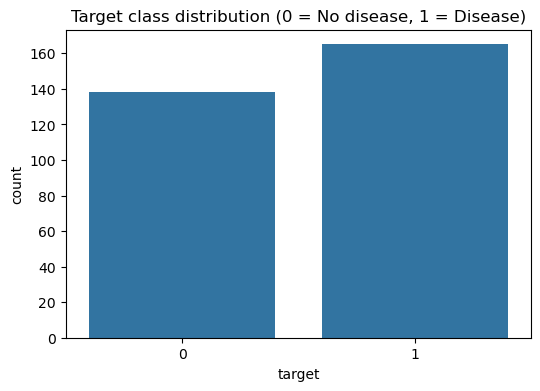

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=dataset)
plt.title('Target class distribution (0 = No disease, 1 = Disease)')
plt.show()


## Data Preprocessing
#### Convert categorical features to dummy variables so ML models can use them. Standardize continuous features so distance-based models (like KNN) and regularized models behave better.

In [4]:
# One-hot encode categorical columns (based on typical heart-disease dataset column names)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(dataset, columns=categorical_cols)

In [5]:
# Standard scale common numeric columns if present
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_cols = [c for c in num_cols if c in dataset.columns]
scaler = StandardScaler()
if num_cols:
    dataset[num_cols] = scaler.fit_transform(dataset[num_cols])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


## Train / Test split
#### Splitting Features and Labels
y → target (0 = no heart disease, 1 = heart disease)

X → all other columns (patient features).

#### Train Test splitting
67% → training data, 33% → testing data.

random_state = 0 ensures reproducibility (same split each run).

In [6]:
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (203, 30)
X_test shape: (100, 30)


## Hyperparameter tuning (GridSearchCV) for each model
#### We use GridSearchCV to search for the best hyperparameters for each model using 5-fold cross-validation on the training set.

In [7]:
# KNN
knn_params = {'n_neighbors': list(range(1,21))}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print('Best KNN params:', knn_grid.best_params_)


# SVC (enable probability to allow ROC plotting)
svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10]}
svc_grid = GridSearchCV(SVC(probability=True), svc_params, cv=5, n_jobs=-1)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_
print('Best SVC params:', svc_grid.best_params_)


# Decision Tree
dt_params = {'max_depth': [3,5,10,None], 'max_features': ['sqrt','log2', None]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print('Best Decision Tree params:', dt_grid.best_params_)


# Random Forest
rf_params = {'n_estimators': [100,200,500], 'max_depth': [5,10,None]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print('Best Random Forest params:', rf_grid.best_params_)

Best KNN params: {'n_neighbors': 4}
Best SVC params: {'C': 0.1, 'kernel': 'linear'}
Best Decision Tree params: {'max_depth': 5, 'max_features': 'sqrt'}
Best Random Forest params: {'max_depth': 5, 'n_estimators': 200}


## Evaluation: predictions, classification reports and confusion matrices
#### For each tuned model, we have computed predictions on the test set, also represented the confusion matrix and print the classification report (precision, recall, F1-score, support).

In [8]:
models = {
'K-Nearest Neighbors': best_knn,
'Support Vector Machine': best_svc,
'Decision Tree': best_dt,
'Random Forest': best_rf
}


results = {}

for name, model in models.items():
    print('\n' + '='*60)
    print(f'Model: {name}')
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'Accuracy: {acc:.4f}')
    cm = confusion_matrix(y_test, y_pred)


    # Classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))


# Print summary accuracies
print('\nSummary accuracies:')
for k,v in results.items():
    print(f'{k}: {v:.4f}')


Model: K-Nearest Neighbors
Accuracy: 0.7900

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        46
           1       0.84      0.76      0.80        54

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100


Model: Support Vector Machine
Accuracy: 0.8100

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        46
           1       0.80      0.87      0.83        54

    accuracy                           0.81       100
   macro avg       0.81      0.80      0.81       100
weighted avg       0.81      0.81      0.81       100


Model: Decision Tree
Accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        46
           1       0.78      0.74

In [9]:
import joblib

# After fitting your model
model.fit(X_train, y_train)

# Save both model and feature names
joblib.dump(model, 'best_model.pkl')
joblib.dump(X_train.columns.tolist(), 'model_features.pkl')


['model_features.pkl']

## Save best model

In [10]:
# Save best model (after training and comparison)
import joblib

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, 'best_heart_model.pkl')

print(f"Saved {best_model_name} model as best_heart_model.pkl")


Saved Support Vector Machine model as best_heart_model.pkl
